# **¿ Qué factores inciden en las enfermedades cardíacas ?** 
### **Análisis exploratorio del dataset Heart Disease UCI**

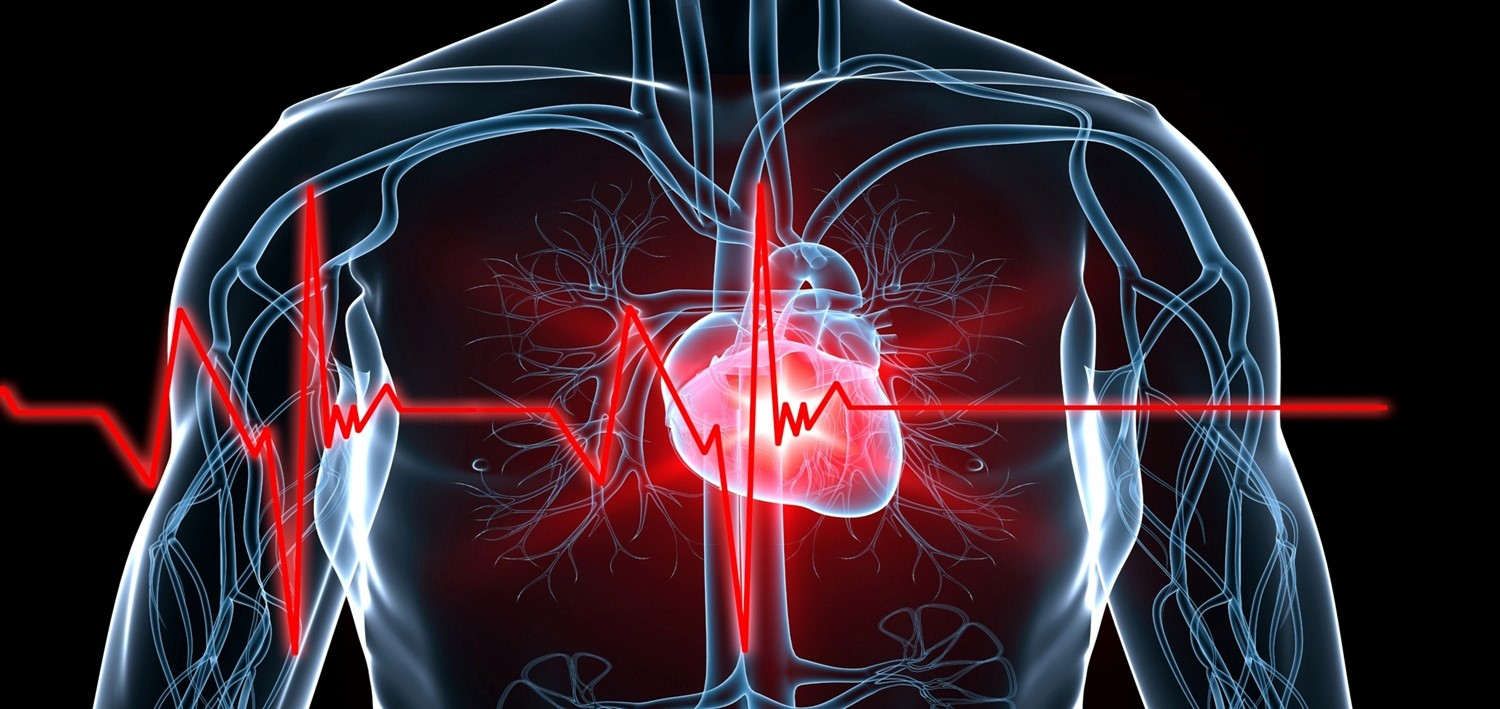

### **Contexto**

Día a día, los casos de enfermedades cardíacas aumentan y es muy importante predecir de antemano dichas enfermedades. Este diagnóstico es una tarea difícil, es decir, debe realizarse de manera precisa y eficiente.
De todas las aplicaciones del aprendizaje automático, diagnosticar cualquier enfermedad grave utilizando una caja negra siempre será difícil de vender. Si el resultado de un modelo es la aplicación de un tratamiento en particular (potencialmente con efectos secundarios), o la cirugía, o la ausencia de tratamiento, la gente querrá saber por qué.


### **Caso de estudio**

En este caso vamos a tratar de responder esa pregunta utilizando el dataset Heart Disease de UCI, aplicando un modelo y validando su precisión.

El dataset contiene una serie de columnas detallando diferentes factores o condiciones, así como un campo objetivo que es si el paciente desarrolló una afección cardíaca o no.

El diagnóstico de una enfermedad cardíaca se realiza mediante una combinación de signos clínicos y resultados de pruebas. Los tipos de pruebas que se realicen se elegirán en función de lo que el médico considere necesario, desde electrocardiogramas, tomografías, hasta análisis de sangre y pruebas de esfuerzo..

Según la bibliografía, los factores de riesgo de enfermedades cardíacas más importantes son:: colesterol alto, presión arterial alta, diabetes, peso, antecedentes familiares y tabaquismo.. 
Los factores principales que no se pueden cambiar son: edad avanzada , género masculino y herencia. La talasemia, una de las variables de este conjunto de datos, es hereditaria. Los principales factores que pueden modificarse son: tabaquismo, colesterol alto, presión arterial alta, inactividad física, sobrepeso y diabetes. Otros factores incluyen estrés, alcohol y mala alimentación.
En cuanto al número de vasos principales, parece lógico suponer que vasos más grandes sea algo beneficioso dado que favorecen el flujo sanguíneo y por lo tanto reducirá la probabilidad de enfermedad cardíaca.


### **Dataset**

De un conjunto de 76 atributos, solo se utilizan 14. Si bien es claro y fácil de comprender, el significado de algunas columnas no es tan obvio.La descripcion de las mismas es la siguiente:
*	age: Edad de la persona en años
*	sex: Sexo (1 = masculino, 0 = femenino)
*	cp: Tipo de dolor en el pecho (1: angina típica, 2: angina atípica, 3: sin dolor de angina, 4: asintomático)
*	trestbps: Presión sanguínea en reposo  
*	chol: Colesterol medido en mg/dl
*	fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
*	restecg: Medida electrocardiográfica en reposo (0 = normal, 1 =  ST-T wave abnormality, 2 = probable or hipertrofia ventricular izquierda confirmada)
*	thalach: Frecuencia cardíaca máxima obtenida
*	exang: Angina inducida (1 = yes; 0 = no)
*	oldpeak: Depresión ST inducida por ejercicio
*	slope: La pendiente en el pico del ejercicio ST
*	ca: Número de vasos principales coloreados por fluoroscopía
*	thal: Condición sanguínea llamada thalasemia (3 = normal; 6 = irreversible; 7 = reversiblet)
*	target: Enfermedad cardíaca  (0 = no, 1 = sí)


### **Análisis **

Como tareas de tratamiento previo,, se le cambian los nombres a las columnas para hacer más fácil su comprensión, se cambian los valores de las variables categóricas para facilitar su interpretación y se corrigen los tipos de algunos campos para pasarlos a categorías.
El dataset final queda de la siguiente manera:

```
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

dt = pd.get_dummies(dt, drop_first=True)

```

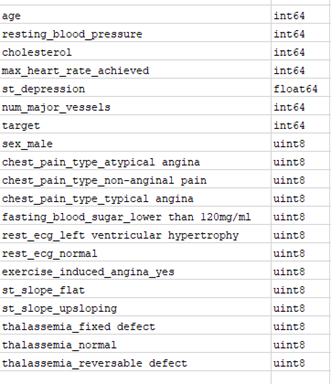


### **Modelo**

Aplicamos Random Forest al conjunto de datos:
```
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state=10) 

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)
```
Para evaluar el modelo, hacemos una matriz de confusión 
```
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
Confusion_matrix

array([
       [28,  7],
       [ 4, 22]
      ])
```

Y calculamos la sensibilidad y especificidad:
```
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensibiidad : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Especificidad : ', specificity)

Sensibiidad :  0.875
Especificidad :  0.7586206896551724
```


### **Discusión**

Podemos estudiar con más atención el factor cantidad de vasos principales utilizando una gráfica de dependencia parcial (Partial Dependence Plot). Estos gráficos varían una sola variable en un solo ejemplo a través de un rango de valores y analizan qué efecto tiene en el resultado. Lo hace para varias filas y grafica el efecto promedio. 
Por lo tanto, para la variable 'num_major_vessels', se obtiene lo siguiente:


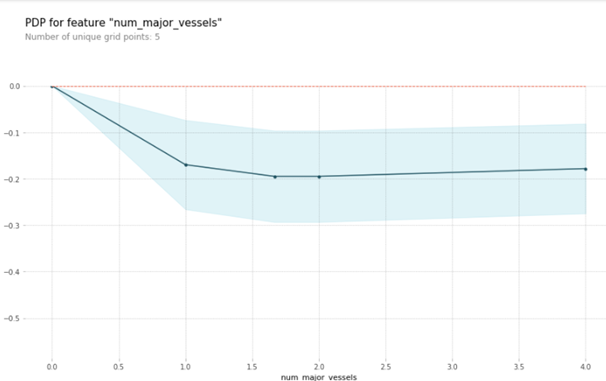

Podemos ver que a medida que aumenta el número de vasos sanguíneos principales, disminuye la probabilidad de enfermedad cardíaca. Eso tiene sentido, ya que significa que puede llegar más sangre al corazón.

Veamos el factor edad:

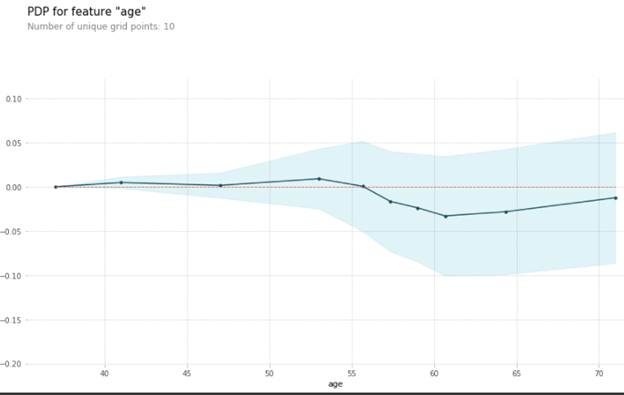

El resultado puede parecer extraño. A mayor mayor menor es la probabilidad de enfermedad cardíaca Sin embargo, las regiones de confianza azules muestran que esto podría no ser cierto (la línea de base roja está dentro de la zona azul).

La frecuencia máxima alcanzada durante una prueba de esfuerzo:

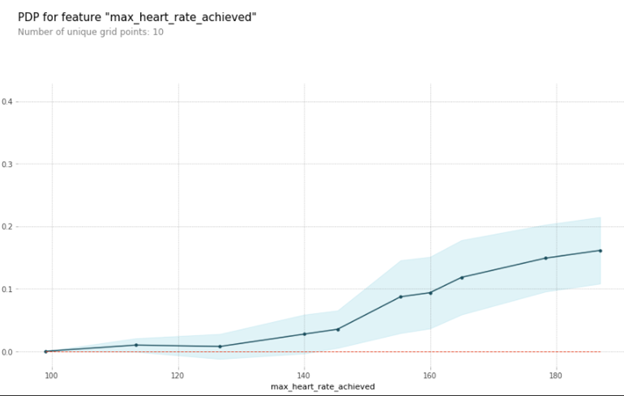

Es claro que un corazón sano tiene menos pulsaciones, por lo tanto al aumentar el pico máximo aumenta la probabilidad de enfermedad..

Veamos un par de gráficas que muestran la influencia de cada variable en la predicción:


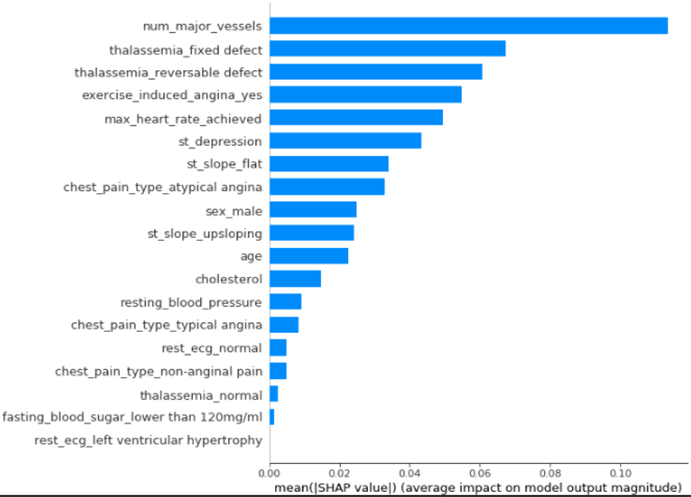

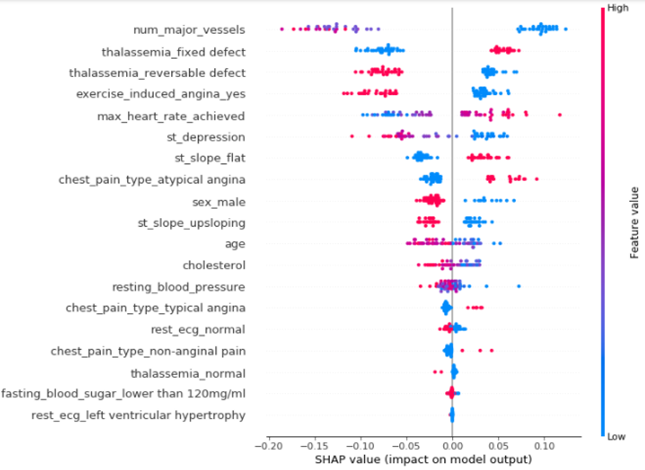

El valor de los vasos principales es bastante claro. Indica que los valores bajos son malos (azul a la derecha). La incidencia de la talasemia es muy importante, siendo el peor síntoma fixed defect. También se puede ver una clara separación en muchas de las otras variables. La máxima frecuencia cardíaca es un ejemplo claro.  Valores altos (rojo a la derecha)  son una mala señal.

Ahora tomemos pacientes individuales para ver cómo las variables afectan su predicción:

```
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)
```



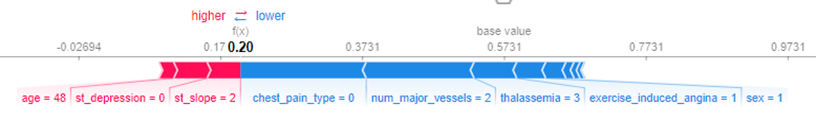

Para esta persona, su predicción es del 20% bastante bajo en comparación con la línea base del 57,3%). Tiene varias cosas a su favor, incluido dos vasos principales, talasemia normal un valor 0 de chest_pain_type.

Veamos otro caso:

```
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)
```


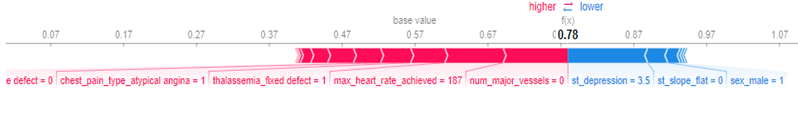

Este otro paciente tiene una predicción muy por encima de la línea de base, 78%. Su situación se explica por no tener vasos principales, padecer talasemia como fixed defect y una alta frecuencia cardíaca.

### **Conclusión**

Si bien el dataset utilizado es un poco antiguo y pequeño para los estándares actuales, ha permitido crear un modelo simple y luego usar varias herramientas y técnicas para descubrir relaciones entre los datos y responder la pregunta fundamental de este caso de estudio: dados los parámetros clínicos de un paciente, podemos predecir si tiene o no una enfermedad cardíaca?
Dentro de los atributos mas significativos a la hora de determinar si el paciente padece o no la enfermedad se encuentran el número de vasos principales, la talasemia y el valor de la frecuencia cardíaca. Se debe tener especial interés en el tipo de dolor en el pecho y la pendiente de la curva de esfuerzo ST.
